## Modules Importation

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings("ignore", message="X does not have valid feature names, but RandomForestClassifier was fitted with feature names")

## Data Acquisation

In [2]:
data = pd.read_csv("hydration level.csv")
column_names = ["sweat_rate","respiration_rate","body_temperature","movement_rate","blood_oxygen_level","body_movement","sleep_rate","heart_rate","Hydration_Level"]
df = data.iloc[1:]
df.columns = column_names
# df.drop(columns=["respiration_rate","movement_rate","body_movement","sleep_rate","heart_rate"],inplace=True)
df

,sweat_rate,respiration_rate,body_temperature,movement_rate,blood_oxygen_level,body_movement,sleep_rate,heart_rate,Hydration_Level
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
5,56.880,19.376,95.376,9.376,94.064,83.44,6.376,58.44,1
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


## Data Analysis

### Input features --- "sweat_rate","respiration_rate","body_temperature",
#### "movement_rate","blood_oxygen_level","body_movement","sleep_rate","heart_rate"

### Target ---- Hydration Levels (0- Under hydrated, 1 –  Need bit more hydration, 2- Hydrated, 3- Very well hydrated, 4 -Over hydrated)

## Data pre-processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 1 to 629
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sweat_rate          629 non-null    float64
 1   respiration_rate    629 non-null    float64
 2   body_temperature    629 non-null    float64
 3   movement_rate       629 non-null    float64
 4   blood_oxygen_level  629 non-null    float64
 5   body_movement       629 non-null    float64
 6   sleep_rate          629 non-null    float64
 7   heart_rate          629 non-null    float64
 8   Hydration_Level     629 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [4]:
df.isna()

,sweat_rate,respiration_rate,body_temperature,movement_rate,blood_oxygen_level,body_movement,sleep_rate,heart_rate,Hydration_Level
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
625,False,False,False,False,False,False,False,False,False
626,False,False,False,False,False,False,False,False,False
627,False,False,False,False,False,False,False,False,False
628,False,False,False,False,False,False,False,False,False


In [5]:
df.isna().sum()

sweat_rate            0
respiration_rate      0
body_temperature      0
movement_rate         0
blood_oxygen_level    0
body_movement         0
sleep_rate            0
heart_rate            0
Hydration_Level       0
dtype: int64

## Data visualisation

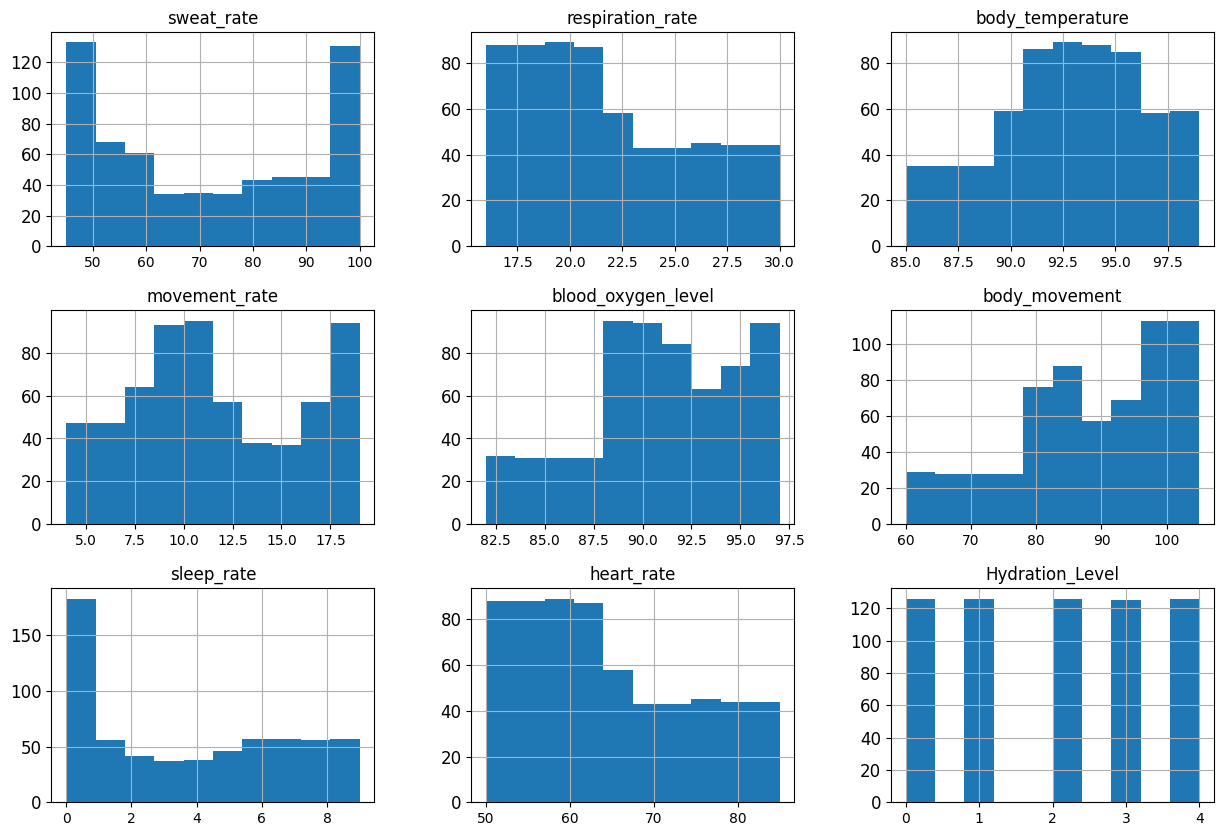

In [6]:
df.hist(figsize=(15,10),xlabelsize=10,ylabelsize=12)
plt.show()

<Axes: xlabel='Hydration_Level', ylabel='count'>

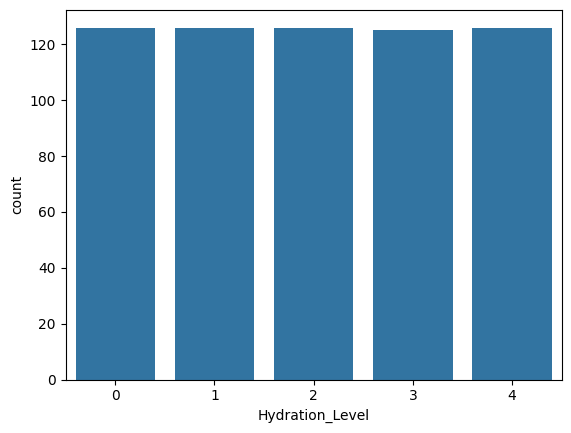

In [7]:
sns.countplot(x='Hydration_Level', data=df)

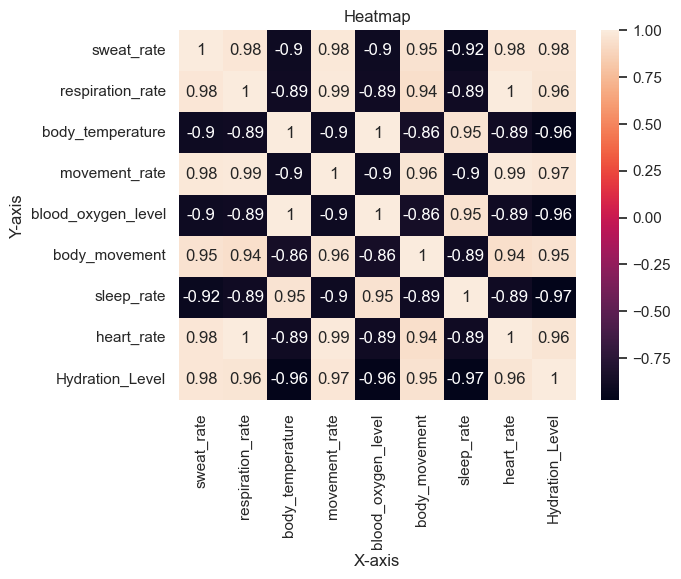

In [8]:
sns.set()  # Set seaborn style
sns.heatmap(df.corr(), annot=True)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Heatmap')

# Display the heatmap
plt.show()

## Data Sampling

In [9]:
X = df.drop(columns="Hydration_Level") # input features
y = df["Hydration_Level"] # target

print(X)

     sweat_rate  respiration_rate  body_temperature  movement_rate  \
1        91.640            25.104            91.552         15.880   
2        60.000            20.000            96.000         10.000   
3        85.760            23.536            90.768         13.920   
4        48.120            17.248            97.872          6.496   
5        56.880            19.376            95.376          9.376   
..          ...               ...               ...            ...   
625      69.600            20.960            92.960         10.960   
626      48.440            17.376            98.064          6.752   
627      97.504            27.504            86.880         17.752   
628      58.640            19.728            95.728          9.728   
629      73.920            21.392            93.392         11.392   

     blood_oxygen_level  body_movement  sleep_rate  heart_rate  
1                89.552          98.88       1.552       72.76  
2                95.000      

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=43)

print("Training data:",X_train.shape)
print("Testing data:",X_test.shape)

Training data: (440, 8)
Testing data: (189, 8)


## Data Standardization

In [11]:
scaler = StandardScaler()

# Fit and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test using the same scaler
X_test_scaled = scaler.transform(X_test)

In [12]:
print("Input features:\n",X_train_scaled)

Input features:
 [[-1.03188485 -0.87517991  0.48589392 ... -0.65456911  0.59250961
  -0.87517991]
 [-1.3943853  -1.46779296  0.95137282 ... -2.38548169  1.12255626
  -1.46779296]
 [-1.08955538 -0.93086168  0.42231631 ... -0.70162305  0.5190378
  -0.93086168]
 ...
 [ 1.27328843  1.2367498  -1.86193625 ...  1.03265053 -1.18918183
   1.2367498 ]
 [ 0.13800295 -0.11552158  0.21795972 ...  0.29995355  0.19891062
  -0.11552158]
 [ 1.22715201  1.01402275 -2.17982429 ...  0.93854266 -1.18918183
   1.01402275]]


## Model training

## Decision tree classifier

In [13]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
y_pred1 = classifier.predict(X_test_scaled)

## Model Evaluation

In [15]:
Accuracy = accuracy_score(y_pred1,y_test)
print("Accuracy score for decission tree:",Accuracy*100)

Accuracy score for decission tree: 99.47089947089947


## Random Forest Classifier

In [16]:
rfclassifier = RandomForestClassifier(max_depth=20, random_state=92)
rfclassifier.fit(X_train_scaled,y_train)
feature_names = X.columns

In [17]:
y_pred2 = rfclassifier.predict(X_test_scaled)

## Model Evaluation

In [18]:
Accuracy = accuracy_score(y_pred2,y_test)
print("Accuracy score for Random forest:",Accuracy*100)

Accuracy score for Random forest: 99.47089947089947


## XGBoost Classifier

In [19]:
xgboost = XGBClassifier(max_depth=5060)
xgboost.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5060, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [20]:
y_pred3 = xgboost.predict(X_test_scaled)

## Model Evaluation

In [21]:
Accuracy = accuracy_score(y_pred3,y_test)
print("Accuracy score for XGB:",Accuracy*100)

Accuracy score for XGB: 99.47089947089947


## Support vector machine

In [22]:
svc = SVC(kernel='sigmoid')
svc.fit(X_train_scaled,y_train)

SVC(kernel='sigmoid')

In [23]:
y_pred4 = svc.predict(X_test_scaled)

## Model Evaluation

In [24]:
Accuracy = accuracy_score(y_pred4,y_test)
print("Accuracy score for SVC:",Accuracy*100)

Accuracy score for SVC: 57.67195767195767


## Saving the best model

In [25]:
with open('RFmodel_pkl' , 'wb') as f:
    pickle.dump(rfclassifier,f)

## Loading saved model

In [26]:
with open('RFmodel_pkl' , 'rb') as f:
    RF = pickle.load(f)

## Prediction using loaded model

### Input features --- "sweat_rate","respiration_rate","body_temperature",
#### "movement_rate","blood_oxygen_level","body_movement","sleep_rate","heart_rate"

### Target ---- Hydration Levels (0- Under hydrated, 1 –  Need bit more hydration, 2- Hydrated, 3- Very well hydrated, 4 -Over hydrated)

In [27]:
import pandas as pd
import pickle

def model_prediction(input):
    data = input

    # Define column names as needed
    columns = ["sweat_rate", "respiration_rate", "body_temperature", "movement_rate", "blood_oxygen_level", "body_movement", "sleep_rate", "heart_rate"]

    df = pd.DataFrame([data], columns=columns)

    # Assuming you have a StandardScaler object named 'scaler'
    scaled_data = scaler.transform(df)

    with open('RFmodel_pkl', 'rb') as f:
        RF = pickle.load(f)

    prediction = RF.predict(scaled_data)
    Output = ""

    if prediction == [0]:
        Output = Output + "Under hydrated"
    elif prediction == [1]:
        Output = Output + "Need bit more hydration"
    elif prediction == [2]:
        Output = Output + "Hydrated"
    elif prediction == [3]:
        Output = Output + "Very well hydrated,"
    elif prediction == [4]:
        Output = Output + "Over hydrated"

    return Output

In [28]:
print(model_prediction([0.0, 0.00, 92.552, 65.880, 27.504, 66.880, 64.256, 0.552]))


Under hydrated


In [29]:
print(model_prediction([60,20,96,10,95,85,7,60]))

Need bit more hydration


In [30]:
print(model_prediction([23.504,27.504,8.880,17.75,284.256,11.88,0.000,25.76]))

Over hydrated


Text(0, 0.5, 'Accuracy')

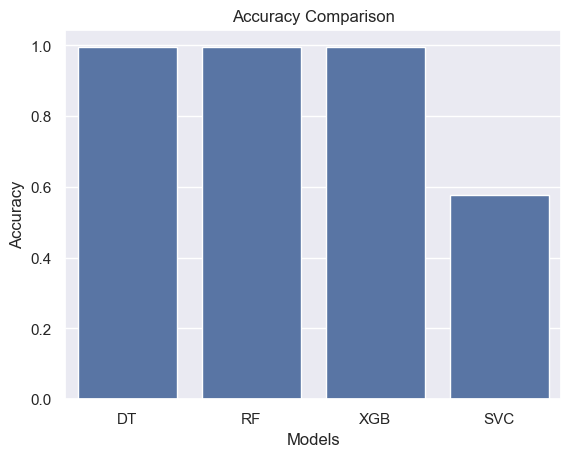

In [31]:
accplot = sns.barplot(x=['DT', 'RF','XGB','SVC'], y=[accuracy_score(y_pred1, y_test), accuracy_score(y_pred2, y_test), accuracy_score(y_pred3, y_test),accuracy_score(y_pred4, y_test)])
accplot.set_title("Accuracy Comparison")
accplot.set_xlabel("Models")
accplot.set_ylabel("Accuracy")